# Step 1: Import Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
import seaborn as sns
import matplotlib.pyplot as plt


# Step 2: Load and Explore Dataset

In [3]:
# Load the dataset
data = pd.read_csv('fish_data.csv')

# Display the first few rows of the dataset
data.head()

,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31


# Step 3: Check for Missing Values

In [4]:
# Check for missing values
print(data.isnull().sum())

# Fill missing values in the 'species' column with 'Unknown'
data['species'] = data['species'].fillna('Unknown')

species      0
length       0
weight       0
w_l_ratio    0
dtype: int64


# Step 4: Encode Categorical Variables

In [5]:
# Encode categorical variables (species)
label_encoder = LabelEncoder()
data['species'] = label_encoder.fit_transform(data['species'])

# Features and labels
X = data.drop(['species'], axis=1)  # Features
y = data['species']  # Target variable

# Step 5: Split the Dataset

In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data (scaling features)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 6: Train and Evaluate Decision Tree Classifier

In [33]:
# Train a Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions using the decision tree model on the test data
y_pred_dt = dt_model.predict(X_test)

# Evaluate Decision Tree
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")

# Display classification report
dt_classification_report = classification_report(y_test, y_pred_dt)
print("Decision Tree Classification Report:\n", dt_classification_report)


Decision Tree Accuracy: 0.92
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       160
           1       1.00      1.00      1.00       125
           2       0.66      0.72      0.69       141
           3       1.00      1.00      1.00       129
           4       1.00      1.00      1.00       132
           5       1.00      1.00      1.00       159
           6       1.00      1.00      1.00       105
           7       0.70      0.64      0.67       146
           8       1.00      1.00      1.00       127

    accuracy                           0.92      1224
   macro avg       0.93      0.93      0.93      1224
weighted avg       0.93      0.92      0.92      1224



# Step 7: Train and Evaluate Random Forest Classifier

In [34]:
# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions using the random forest model on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")

# Display classification report
rf_classification_report = classification_report(y_test, y_pred_rf)
print("Random Forest Classification Report:\n", rf_classification_report)

Random Forest Accuracy: 0.93
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       160
           1       1.00      1.00      1.00       125
           2       0.67      0.70      0.69       141
           3       1.00      1.00      1.00       129
           4       1.00      1.00      1.00       132
           5       1.00      1.00      1.00       159
           6       1.00      1.00      1.00       105
           7       0.70      0.66      0.68       146
           8       1.00      1.00      1.00       127

    accuracy                           0.93      1224
   macro avg       0.93      0.93      0.93      1224
weighted avg       0.93      0.93      0.93      1224



# Step 8: Train and Evaluate Naive Bayes Classifier

In [35]:
# Train a Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions using the Naive Bayes model on the test data
y_pred_nb = nb_model.predict(X_test)

# Evaluate Naive Bayes
nb_accuracy = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {nb_accuracy:.2f}")

# Display classification report
nb_classification_report = classification_report(y_test, y_pred_nb)
print("Naive Bayes Classification Report:\n", nb_classification_report)


Naive Bayes Accuracy: 0.93
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       160
           1       1.00      1.00      1.00       125
           2       0.74      0.62      0.67       141
           3       1.00      1.00      1.00       129
           4       1.00      1.00      1.00       132
           5       1.00      1.00      1.00       159
           6       1.00      1.00      1.00       105
           7       0.68      0.79      0.73       146
           8       1.00      1.00      1.00       127

    accuracy                           0.93      1224
   macro avg       0.94      0.93      0.93      1224
weighted avg       0.93      0.93      0.93      1224



# Step 9: Build, Train, and Evaluate ANN Model

In [13]:
# Check the number of unique classes in the dataset
print("Unique classes in y_train:", np.unique(y_train))
print("Unique classes in y_test:", np.unique(y_test))

# Get the number of unique classes
num_classes = len(np.unique(y_train))

# Build the ANN model with the correct number of output classes
ann_model = Sequential()
ann_model.add(Input(shape=(X_train.shape[1],)))  # Input layer
ann_model.add(Dense(128, activation='relu'))
ann_model.add(Dropout(0.3))  # Dropout for regularization
ann_model.add(Dense(64, activation='relu'))
ann_model.add(Dropout(0.3))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(num_classes, activation='softmax'))  # Correct number of output classes

# Compile the ANN model
ann_model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the ANN model
history = ann_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Make predictions using the ANN model on the test data
y_pred_ann = np.argmax(ann_model.predict(X_test), axis=1)




Unique classes in y_train: [0 1 2 3 4 5 6 7 8]
Unique classes in y_test: [0 1 2 3 4 5 6 7 8]
Epoch 1/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3441 - loss: 1.8605 - val_accuracy: 0.7623 - val_loss: 0.7556
Epoch 2/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7732 - loss: 0.6475 - val_accuracy: 0.9020 - val_loss: 0.2825
Epoch 3/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8408 - loss: 0.3613 - val_accuracy: 0.9036 - val_loss: 0.1905
Epoch 4/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8781 - loss: 0.2564 - val_accuracy: 0.9158 - val_loss: 0.1716
Epoch 5/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8951 - loss: 0.2255 - val_accuracy: 0.9158 - val_loss: 0.1562
Epoch 6/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9060 - loss: 0.1908 - val_accuracy: 0.9142 - val_loss: 0.1491
Epoch 7/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9140 - loss: 0.1810 - val_accuracy: 0.9191 - val_loss: 0.1459
Epoch 8/50
90/90 ━━━━━━━━

In [55]:
# Evaluate ANN
ann_accuracy = accuracy_score(y_test, y_pred_ann)
print(f"ANN Accuracy: {ann_accuracy:.2f}")

ann_cr = classification_report(y_test, y_pred_ann)
print("ANN Classification Report:\n", ann_cr)

ANN Accuracy: 0.93
ANN Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       160
           1       1.00      1.00      1.00       125
           2       0.68      0.74      0.71       141
           3       1.00      1.00      1.00       129
           4       1.00      1.00      1.00       132
           5       1.00      1.00      1.00       159
           6       1.00      1.00      1.00       105
           7       0.72      0.66      0.69       146
           8       1.00      1.00      1.00       127

    accuracy                           0.93      1224
   macro avg       0.93      0.93      0.93      1224
weighted avg       0.93      0.93      0.93      1224



# Step 10: Compare Model Accuracies

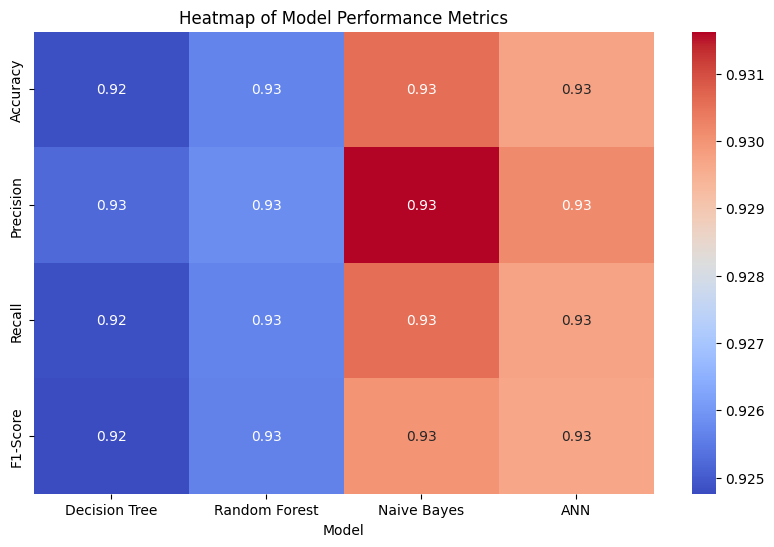

In [29]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Create a DataFrame for metrics comparison
metrics_comparison = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'Naive Bayes', 'ANN'],
    'Accuracy': [dt_accuracy, rf_accuracy, nb_accuracy, ann_accuracy],
    'Precision': [classification_report(y_test, y_pred_dt, output_dict=True)['weighted avg']['precision'],
                  classification_report(y_test, y_pred_rf, output_dict=True)['weighted avg']['precision'],
                  classification_report(y_test, y_pred_nb, output_dict=True)['weighted avg']['precision'],
                  classification_report(y_test, y_pred_ann, output_dict=True)['weighted avg']['precision']],
    'Recall': [classification_report(y_test, y_pred_dt, output_dict=True)['weighted avg']['recall'],
               classification_report(y_test, y_pred_rf, output_dict=True)['weighted avg']['recall'],
               classification_report(y_test, y_pred_nb, output_dict=True)['weighted avg']['recall'],
               classification_report(y_test, y_pred_ann, output_dict=True)['weighted avg']['recall']],
    'F1-Score': [classification_report(y_test, y_pred_dt, output_dict=True)['weighted avg']['f1-score'],
                 classification_report(y_test, y_pred_rf, output_dict=True)['weighted avg']['f1-score'],
                 classification_report(y_test, y_pred_nb, output_dict=True)['weighted avg']['f1-score'],
                 classification_report(y_test, y_pred_ann, output_dict=True)['weighted avg']['f1-score']]
})

# Plot the comparison of metrics using bar charts
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Heatmap of Model Performance
plt.figure(figsize=(10, 6))
sns.heatmap(metrics_comparison.set_index('Model').T, annot=True, cmap='coolwarm', cbar=True)
plt.title("Heatmap of Model Performance Metrics")
plt.show()


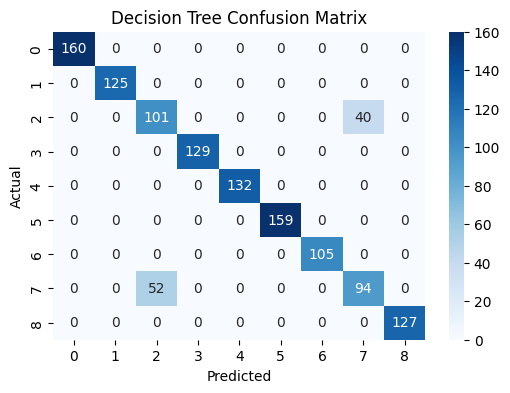

In [43]:
# Decision Tree Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

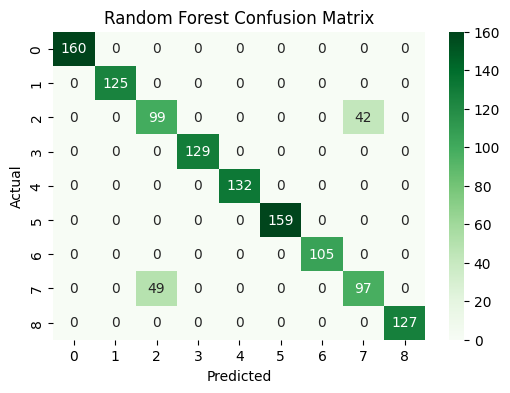

In [44]:
# Random Forest Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

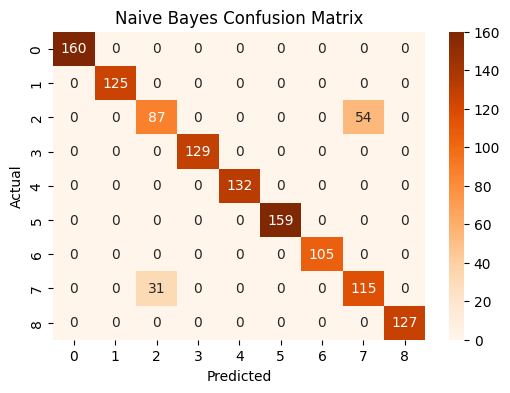

In [45]:
# Naive Bayes Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Oranges')
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

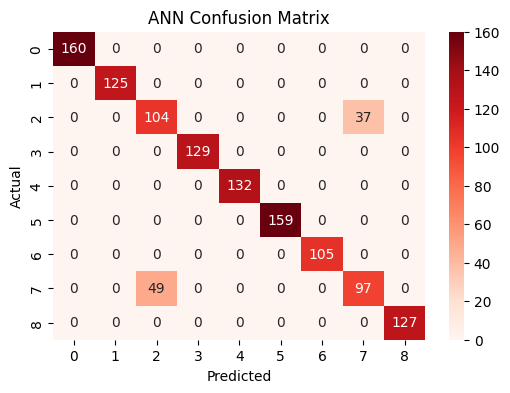

In [50]:
# ANN Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_ann), annot=True, fmt='d', cmap='Reds')
plt.title("ANN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()